In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

## Solution to Exercises

### Great Migration

DATASETS: migration.xlsx; uscities.xlsx 

2) We'll use pandas to import the datafile migration.xlsx into a dataframe called migration.

In [3]:
migration=pd.read_excel('migration.xlsx')
migdf=migration #make a copy of the original dataframe
migdf.columns=["City","Mig2","Mig1"] #rename the columns
migdf["city"]="city"  #create a column for the city
migdf["state"]="state"  #create a column for the state
for m in migdf.index:
    x=migdf.loc[m,"City"].split(", ")  #split the city from the state
    migdf.loc[m,"city"]=x[0]  #add the city to the city column
    migdf.loc[m,"state"]=x[1]  #add the state to the state column
migdf.drop(['City'], axis=1, inplace=True) #Drop the original City column
migdf=migdf.set_index(["city","state"],drop=True) #create multi-index
rawlatlon=pd.read_excel("uscities.xlsx") #read data
latlon=rawlatlon[["city_ascii","lat","lng","state_id"]] #select columns
latlon.columns=["city","lat","lon","state"] #rename columns
latlon=latlon.set_index(["city","state"],drop=True) #create multi-index
df=pd.merge(latlon,migdf, how='inner', left_index=True,right_index=True)
df.columns=["lat","lon","Mig2","Mig1"]
df=df[df["Mig1"]!="No data"]
df=df[df["Mig2"]!="No data"]
df.head(2)

,,lat,lon,Mig2,Mig1
city,state,,,,
Seattle,WA,47.6211,-122.3244,0.1,6.1
Spokane,WA,47.6671,-117.4330,-0.2,0.7


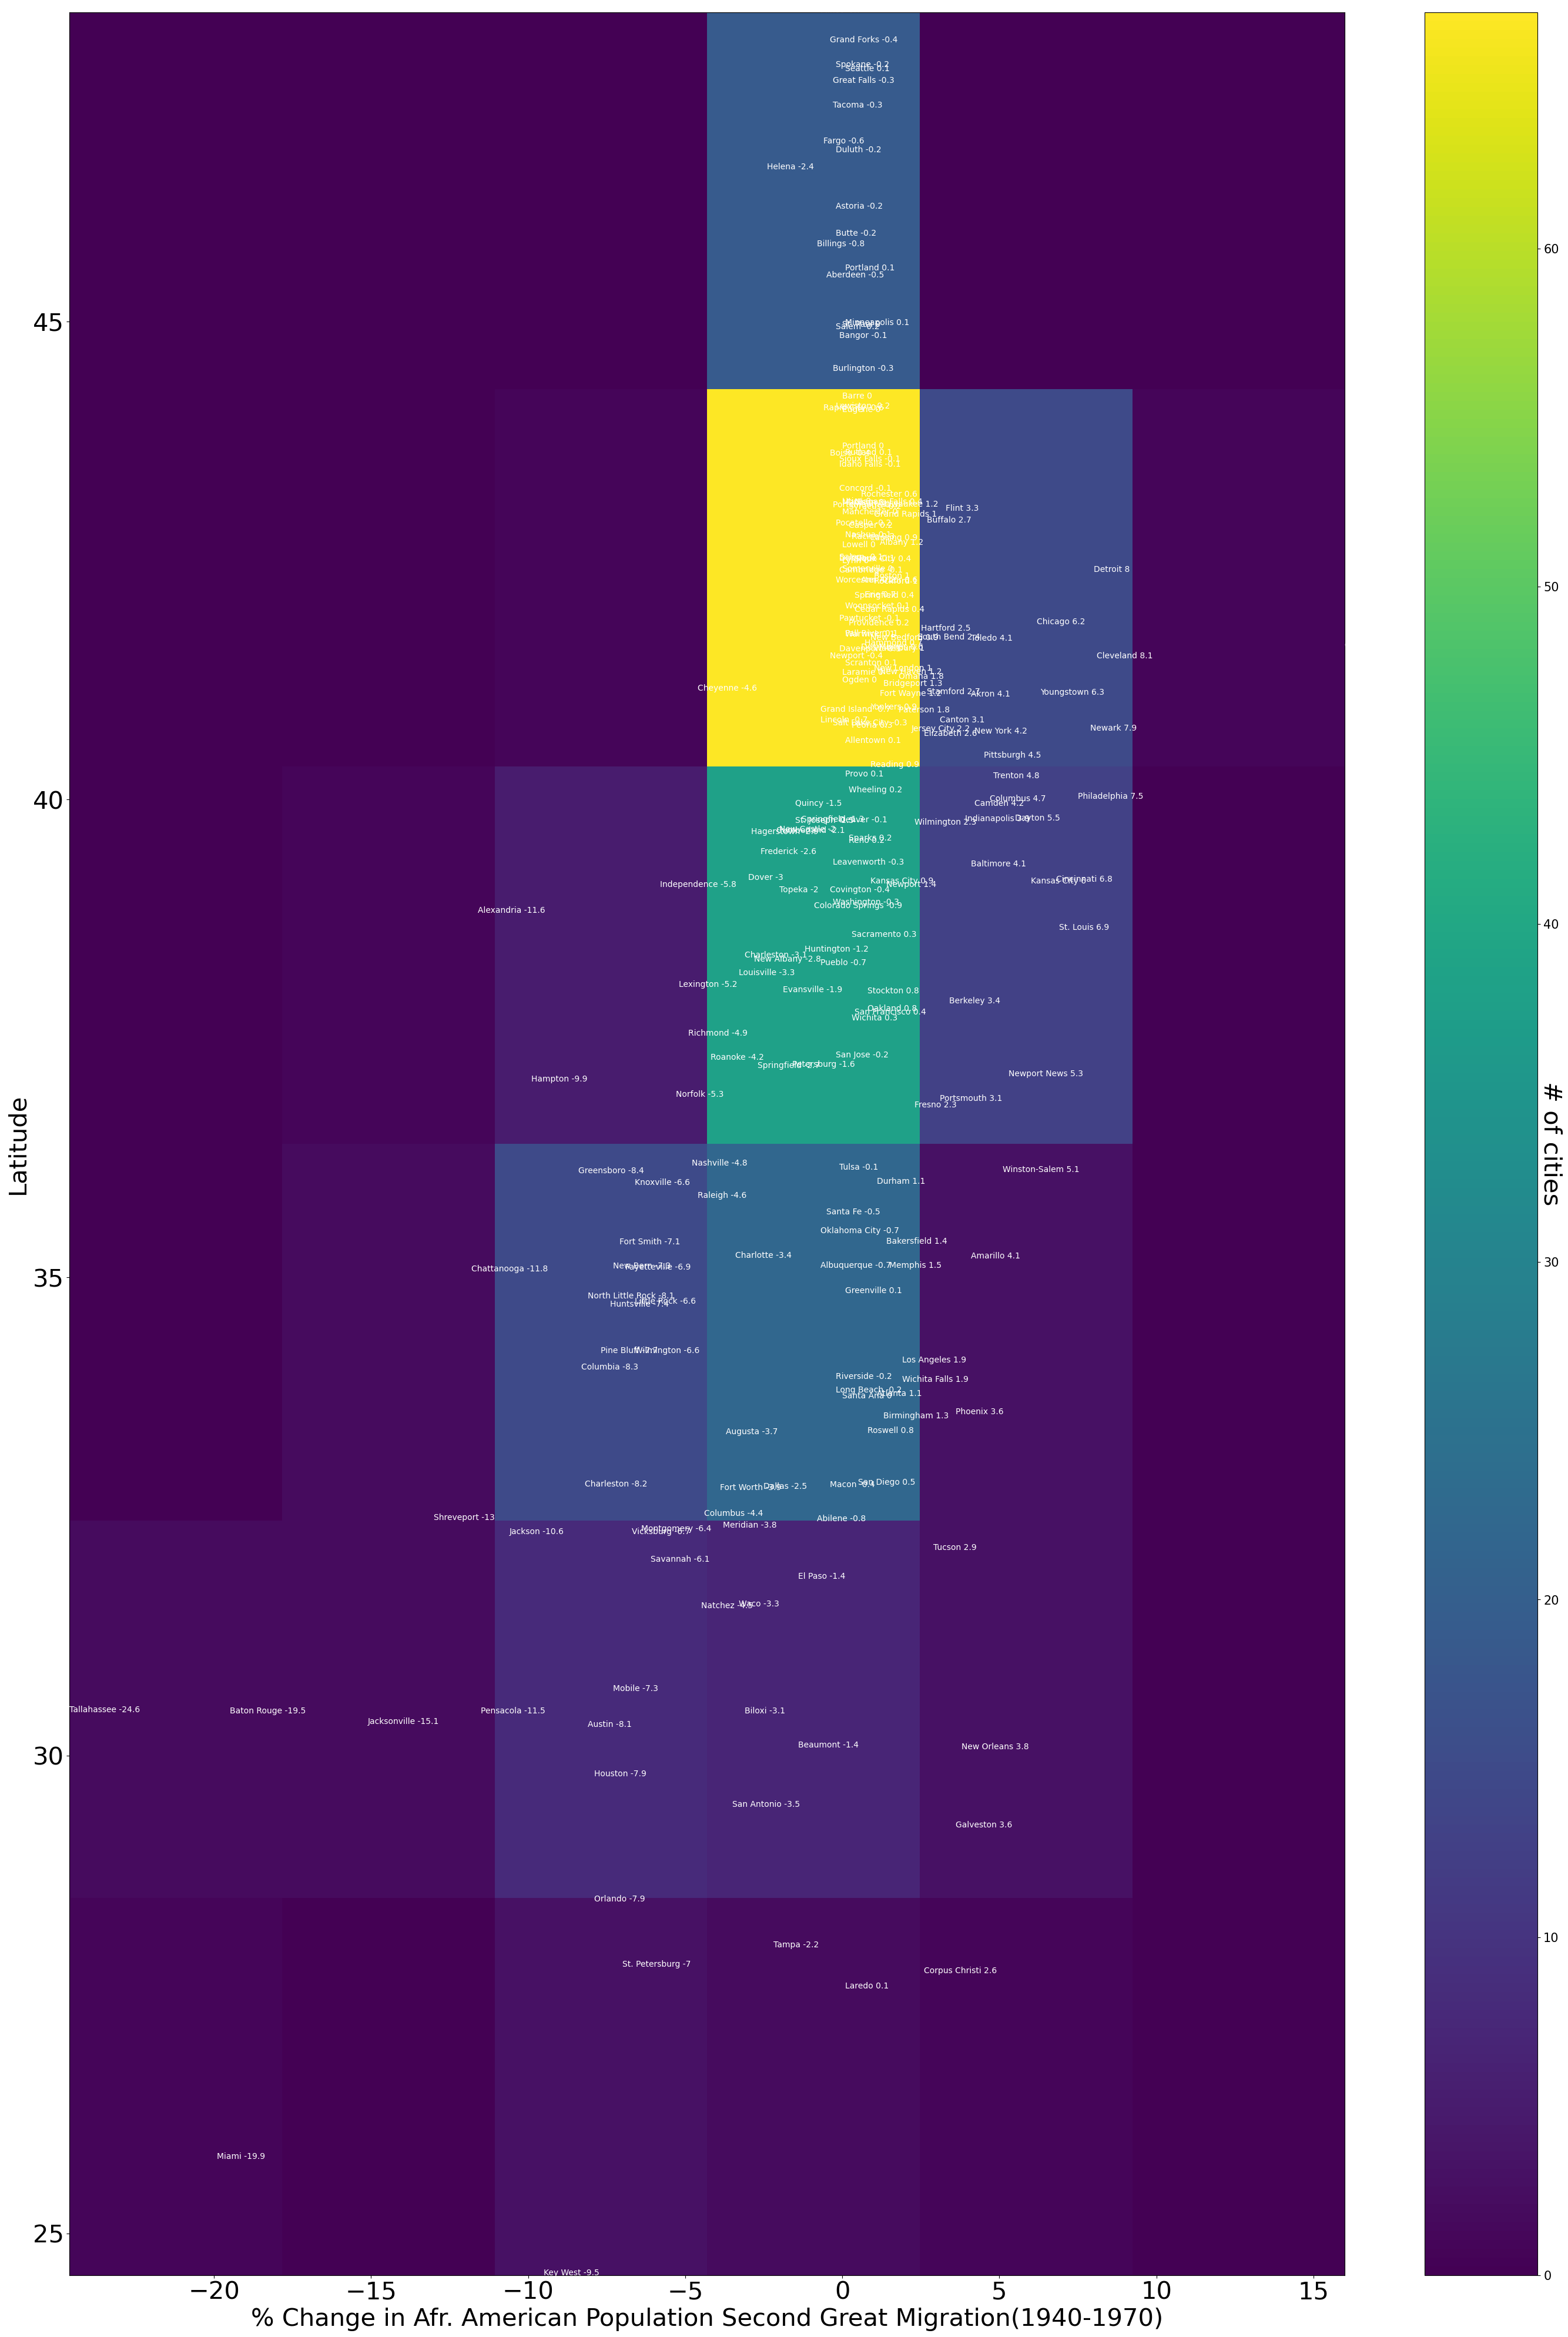

In [4]:
#All cities
fig=plt.figure(figsize=(35, 50))
X=df["Mig2"].astype(float)
Y=df["lat"]
heat_map= plt.hist2d(X, Y, bins=6) #heat map is a 2dimensional histogram
plt.xlabel("% Change in Afr. American Population Second Great Migration(1940-1970)",size=30)
plt.ylabel("Latitude",size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
names=df.reset_index()
for i in names.index:   ##add the names of the cities and %change in Afr. American population
    plt.text(names.Mig2[i],names.lat[i],names.city[i]+' '+str(names.Mig2[i]),fontsize=10,color='white')
cbar = plt.colorbar()
cbar.set_label('# of cities', rotation=270,size=30)
cbar.ax.tick_params(labelsize=15)
fig.savefig("Migration2.png")

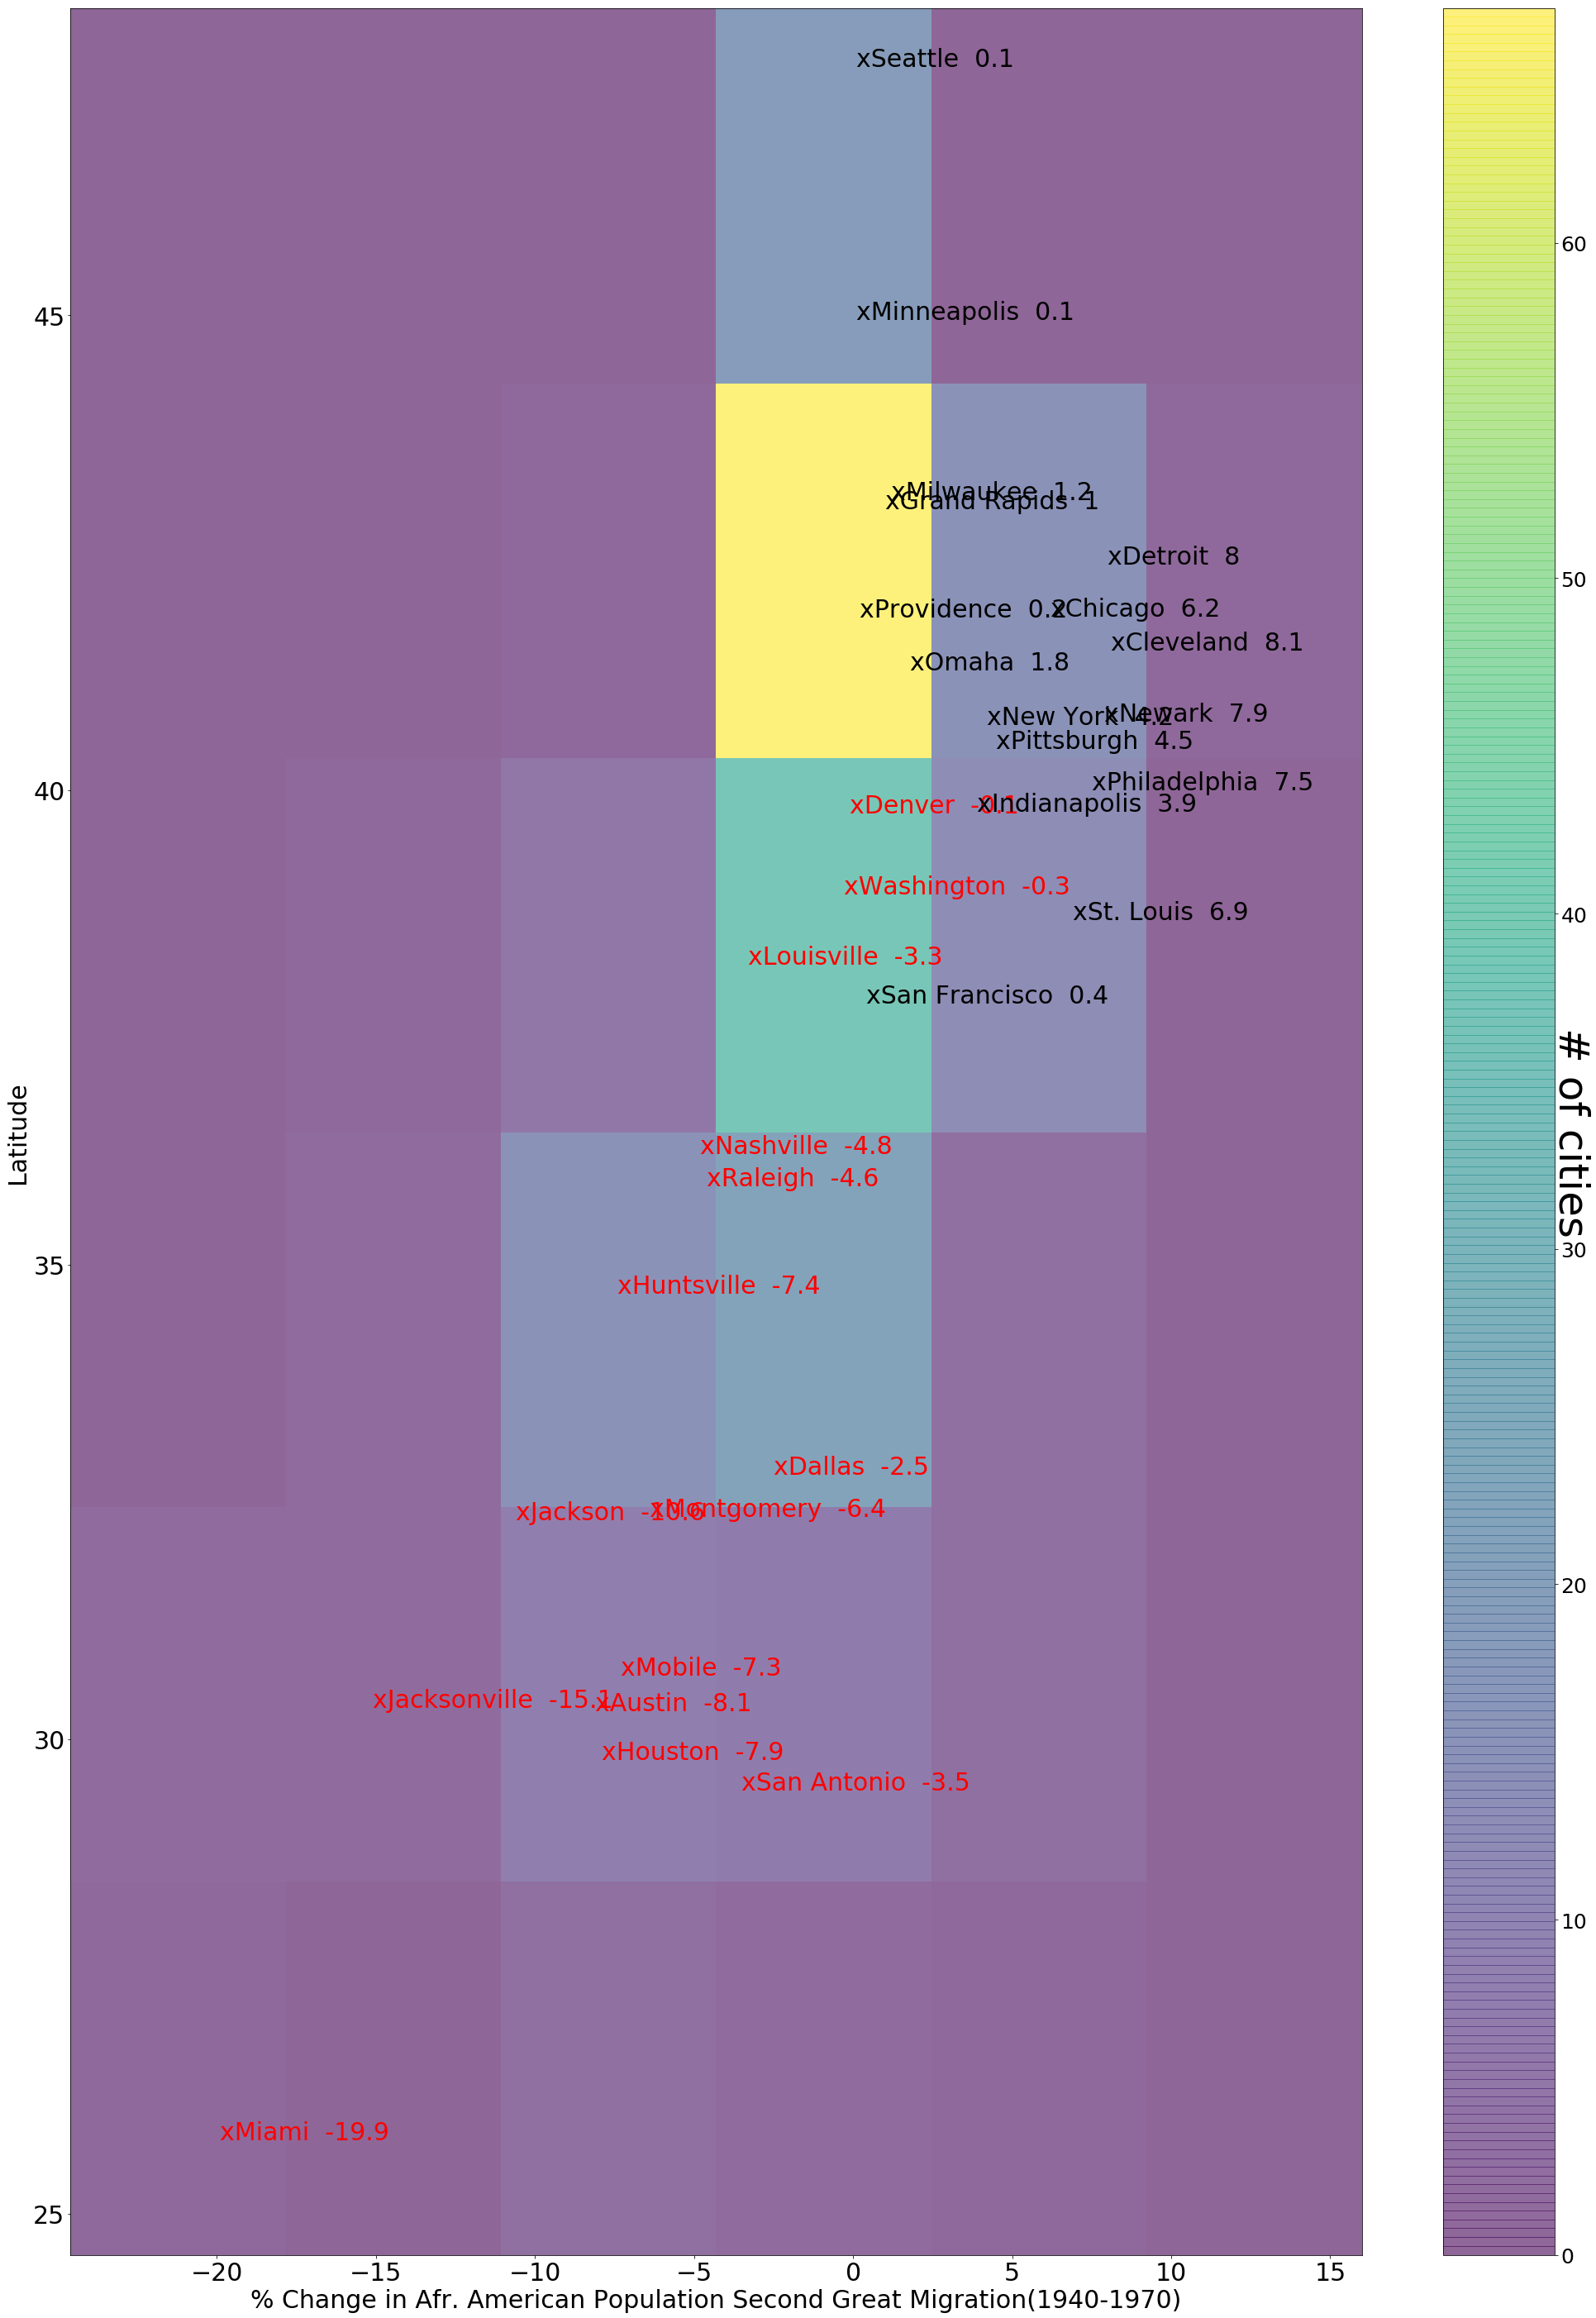

In [16]:
#Selected Cities
fig=plt.figure(figsize=(35, 50))
X=df["Mig2"].astype(float)
Y=df["lat"]
heat_map= plt.hist2d(X, Y, bins=6,alpha=.6) #heat map is a 2dimensional histogram
plt.xlabel("% Change in Afr. American Population Second Great Migration(1940-1970)",size=30)
plt.ylabel("Latitude",size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
names=df.reset_index()
for i in names.index:   ##add the names of the cities and %change in Afr. American population
    if names.Mig2[i]<0 and any(names.loc[i,'city'] in x for x in ["Austin","Chicago","Detroit","Cleveland","Dallas","Denver","Grand Rapids","Houston","Huntsville","Indianapolis","Jacksonville","Louisville","Miami","Milwaukee","Minneapolis","Montgomery","Mobile","Nashville","New York","New Orleans","Newark","Omaha","Philadelphia","Pittsburgh","Providence","Raleigh","San Antonio","San Francisco","Seattle","St. Louis","Washington, DC",]):
        plt.text(names.Mig2[i],names.lat[i],"x"+names.city[i]+'  '+str(names.Mig2[i]),fontsize=30,color='red')
    else:
        if any(names.loc[i,'city'] in x for x in ["Chicago","Detroit","Cleveland","Dallas","Grand Rapids","Indianapolis","Louisville","Milwaukee","Minneapolis","Montgomery","Nashville","New York","Newark","Omaha","Philadelphia","Pittsburgh","Providence","Raleigh","San Francisco","Seattle","St. Louis","Washington, DC",]):
            plt.text(names.Mig2[i],names.lat[i],"x"+names.city[i]+'  '+str(names.Mig2[i]),fontsize=30,color='black')

cbar = plt.colorbar()
cbar.set_label('# of cities', rotation=270,size=50)
cbar.ax.tick_params(labelsize=25)
fig.savefig("Migration2Simplified.png")

The percent changes were in general smaller in the 2nd Great Migration. For example, in Chicago the increase in African American population was 24.6% in the 1st Great Migration and 6.2% in the 2nd Great Migration.

### Hardship Index

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


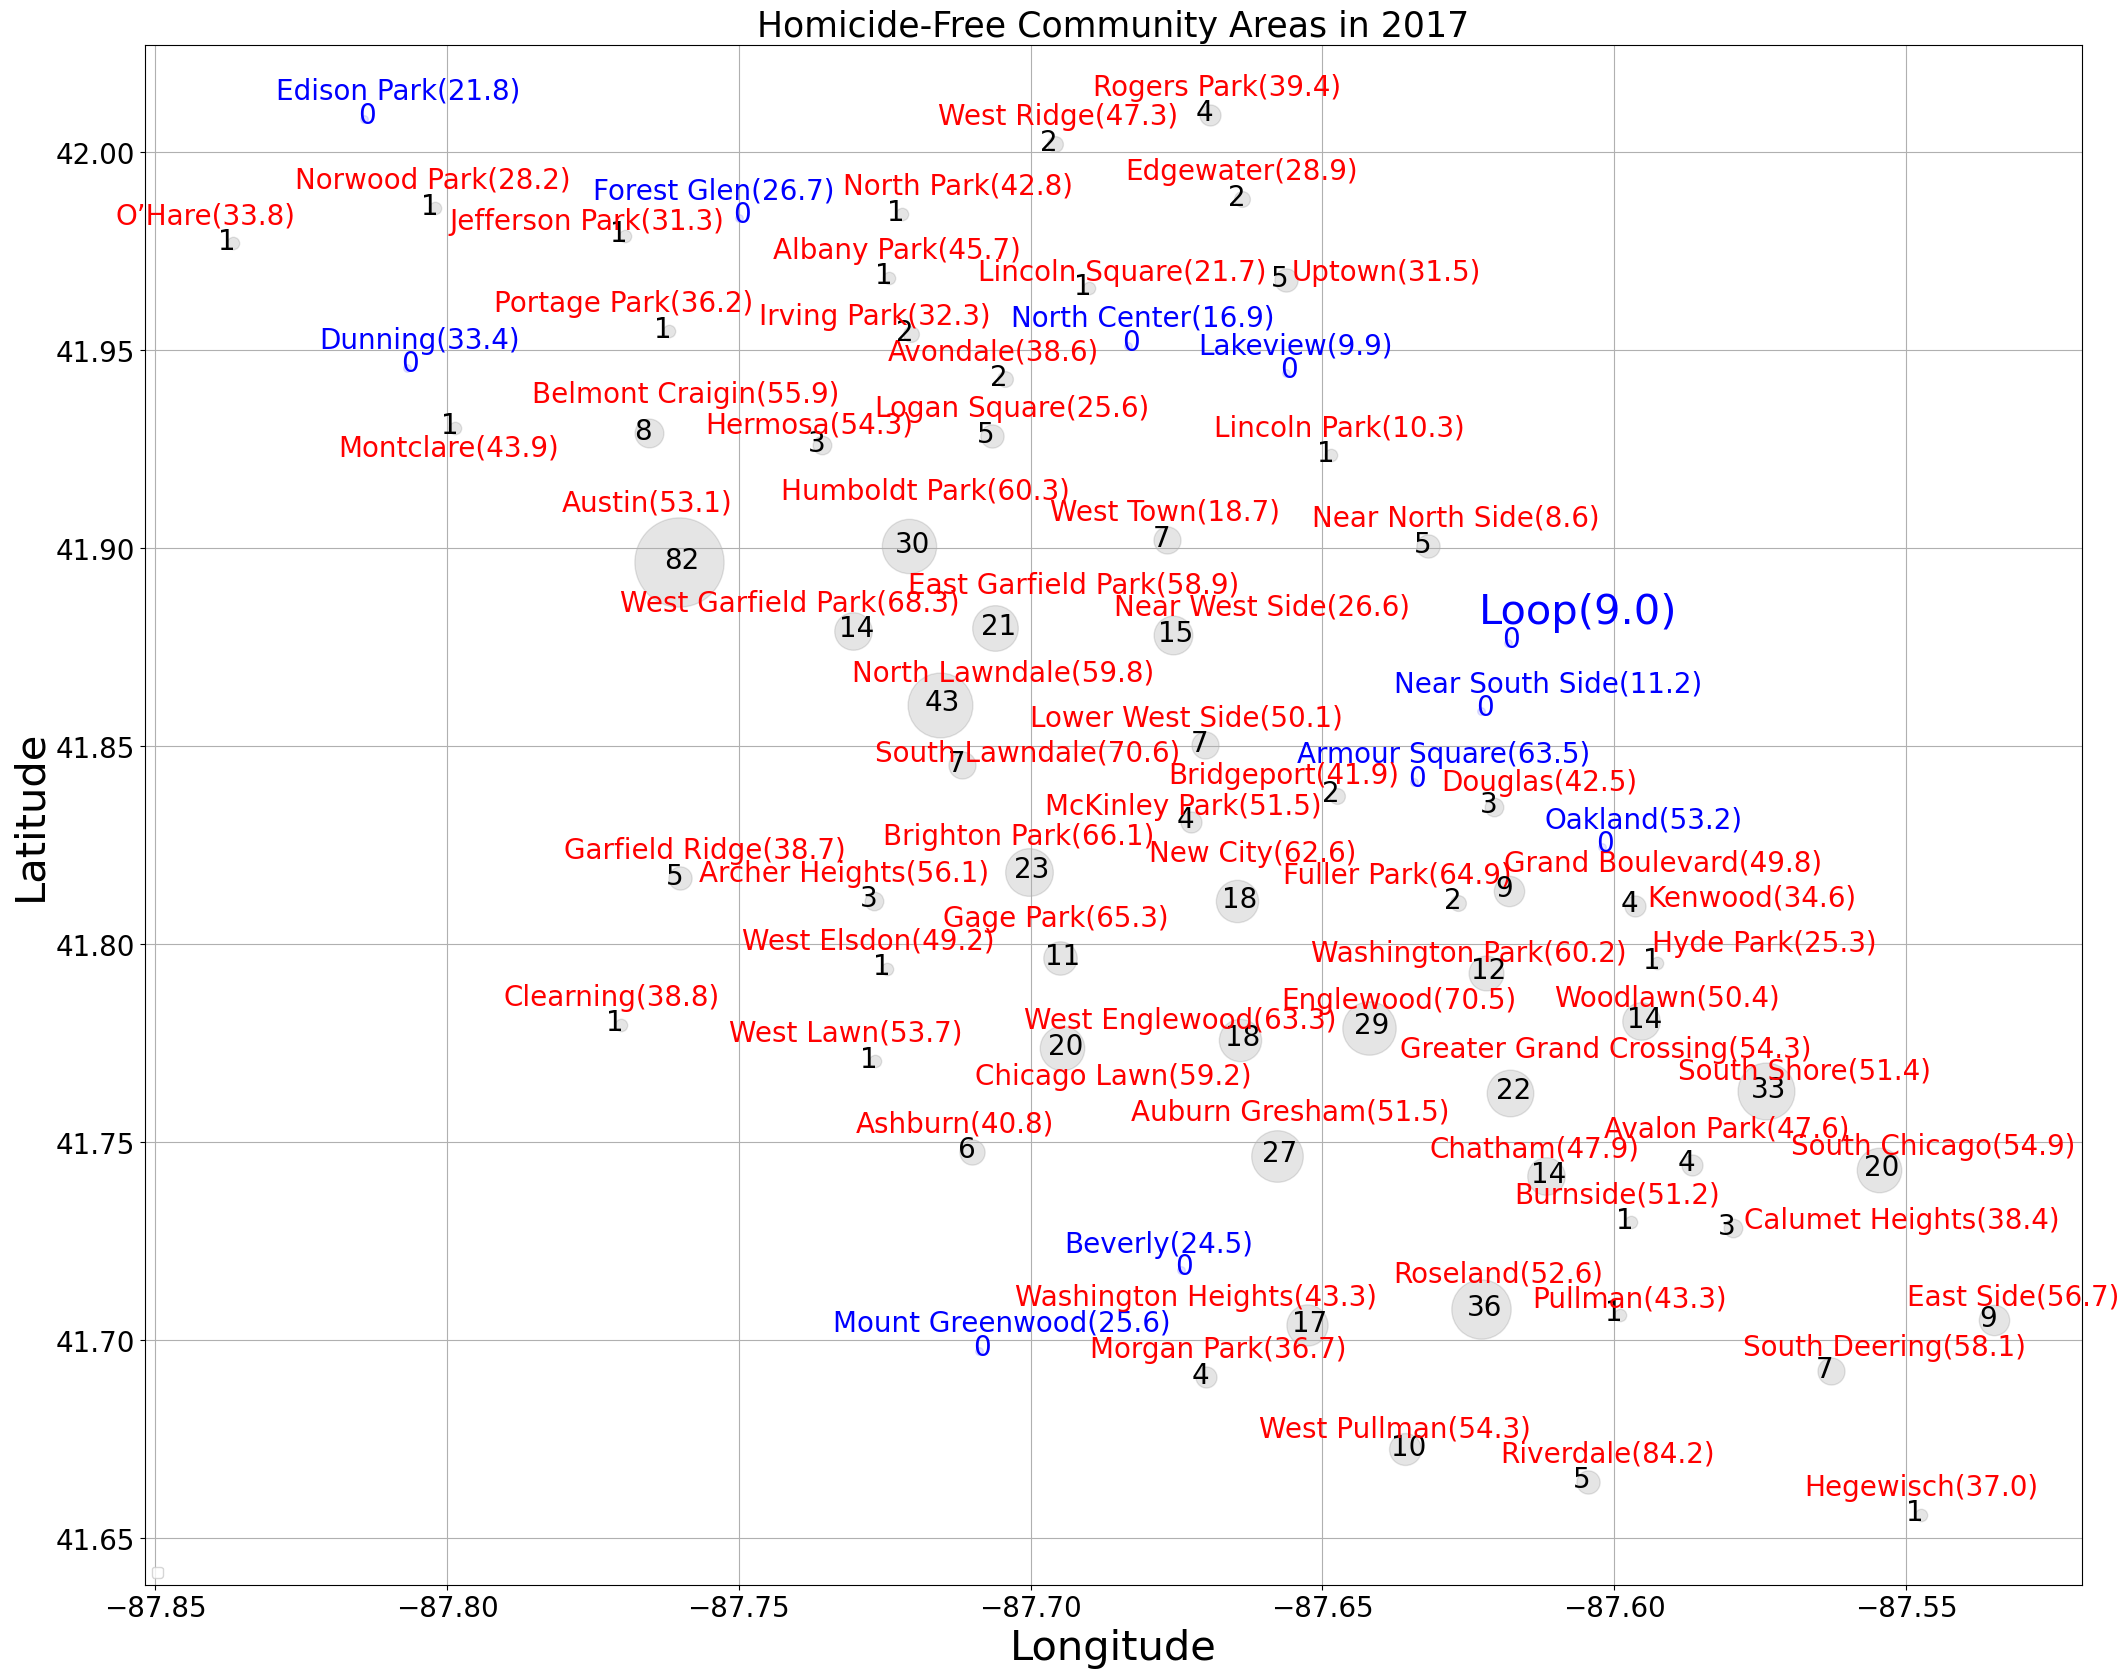

In [4]:
raw_hardship=pd.read_excel('HIHOM20142017.xlsx')
dfHI14=raw_hardship[["Community","population(K)","HI14","UNEMP14","NOHS14","DEP14","HOUS14","POV14","INC14","HOM14","LAT","LON"]]
dfHI17=raw_hardship[["Community","population(K)","HI17","UNEMP17","NOHS17","DEP17","HOUS17","POV17","INC17","HOM17","LAT","LON"]]
hom_df = dfHI17
fig=plt.figure(figsize=(25,20))

for i in hom_df.index:
    if hom_df.loc[i,"HOM17"]==0:   
        plt.scatter(hom_df.loc[i,'LON'], hom_df.loc[i,'LAT'],s=30,color='b', alpha=0.1)
        plt.gca().text(hom_df.loc[i,'LON']-.001, hom_df.loc[i,'LAT']-.001,str(hom_df.loc[i,'HOM17']),color='b', alpha=1,size=20)
        if hom_df.loc[i,"Community"] in ["Loop"]:
            plt.gca().text(hom_df.loc[i,'LON']-.005, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=30)
        elif hom_df.loc[i,"Community"] in ["Hyde Park","Near West Side","Kenwood","Near North Side","West Town"]:
            plt.gca().text(hom_df.loc[i,'LON']+.003, hom_df.loc[i,'LAT']-.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Lincoln Park","Uptown","Edgewater","Rogers Park","Logan Square","Avondale"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']-.0075, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Lincoln Square","Irving Park","Portage Park","Jefferson Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025, hom_df.loc[i,'LAT']-.0075, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Dunning","O’Hare","Edison Park","Norwood Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
               
        elif hom_df.loc[i,"Community"] in ["Garfield Ridge","Clearning","Ashburn","Morgan Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.0015, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Hegewisch"]:
            plt.gca().text(hom_df.loc[i,'LON']-.01, hom_df.loc[i,'LAT']-.0075, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Forest Glen"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["North Center"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Oakland"]:
            plt.gca().text(hom_df.loc[i,'LON']-.01, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Mount Greenwood"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Lakeview"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Near South Side"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
      
        elif hom_df.loc[i,"Community"] in ["Edison Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='green', size=20)
        elif hom_df.loc[i,"Community"] in ["Beverly"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02, hom_df.loc[i,'LAT']+.0045, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        
        
        else:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        
    else:
        plt.scatter(hom_df.loc[i,'LON'], hom_df.loc[i,'LAT'],s=30+50*hom_df.loc[i,'HOM17'],color='k', alpha=0.1)
        plt.gca().text(hom_df.loc[i,'LON']-.0025, hom_df.loc[i,'LAT']-.0015,hom_df.loc[i,'HOM17'],color='k', alpha=1,size=20)
        if hom_df.loc[i,"Community"] in ["Austin"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.013, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Belmont Craigin"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.0078, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Chicago Lawn"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']-.009, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Pullman"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.002,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Roseland"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.007,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Garfield Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.04,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Oakland","Armour Square"]:
            plt.gca().text(hom_df.loc[i,'LON']-.001,hom_df.loc[i,'LAT']+.002,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Bridgeport"]:
            plt.gca().text(hom_df.loc[i,'LON']-.029,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["South Shore"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Pullman"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Washington Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
       
        elif hom_df.loc[i,"Community"] in ["Washington Heights"]:
            plt.gca().text(hom_df.loc[i,'LON']-.05,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Ridge","Albany Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["North Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.01,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Lincoln Square"]:
            plt.gca().text(hom_df.loc[i,'LON']-.019,hom_df.loc[i,'LAT']+.002,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Hermosa"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Montclare"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']-.007, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Town"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Near West Side"]:
            plt.gca().text(hom_df.loc[i,'LON']-.01,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Lower West Side"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["North Lawndale"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.006,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Douglas"]:
            plt.gca().text(hom_df.loc[i,'LON']-.009,hom_df.loc[i,'LAT']+.004,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Archer Heights"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["New City"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.01, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["South Chicago"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.004, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Lawn"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Kenwood"]:
            plt.gca().text(hom_df.loc[i,'LON']+.002,hom_df.loc[i,'LAT'], hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Grand Boulevard"]:
            plt.gca().text(hom_df.loc[i,'LON']-.001,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Fuller Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Hyde Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.001,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Calumet Heights"]:
            plt.gca().text(hom_df.loc[i,'LON']+.002,hom_df.loc[i,'LAT'],hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Jefferson Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.0015,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Uptown"]:
            plt.gca().text(hom_df.loc[i,'LON']+.001,hom_df.loc[i,'LAT'],hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Englewood"]:
            plt.gca().text(hom_df.loc[i,'LON']-.037,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Portage Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Irving Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.026, hom_df.loc[i,'LAT']+.0025, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Humboldt Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.022,hom_df.loc[i,'LAT']+.012,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Brighton Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.007, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["South Lawndale"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.001, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["McKinley Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.002, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Elsdon"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Gage Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.008, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Woodlawn"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.004, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Englewood"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Greater Grand Crossing"]:
            plt.gca().text(hom_df.loc[i,'LON']-.019,hom_df.loc[i,'LAT']+.009, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Auburn Gresham"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.009, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Avalon Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.007,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Burnside"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["East Side","South Deering"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.004, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Riverdale"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Norwood Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.024,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["East Garfield Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.009,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
       
        else:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        
#plt.gca().set_facecolor('lightgray')
plt.gca().grid()
plt.yticks(fontsize=20) 
plt.xticks(fontsize=20)
#title
plt.title('Homicide-Free Community Areas in 2017',size=25)
plt.xlabel("Longitude",size=30)
plt.ylabel("Latitude",size=30)
plt.legend(loc="lower left")
fig.savefig("Fig5.png") 
#show the plot
plt.show()

Modify the map so that the marker size and label corresponding to homicide rate rather than homicide count

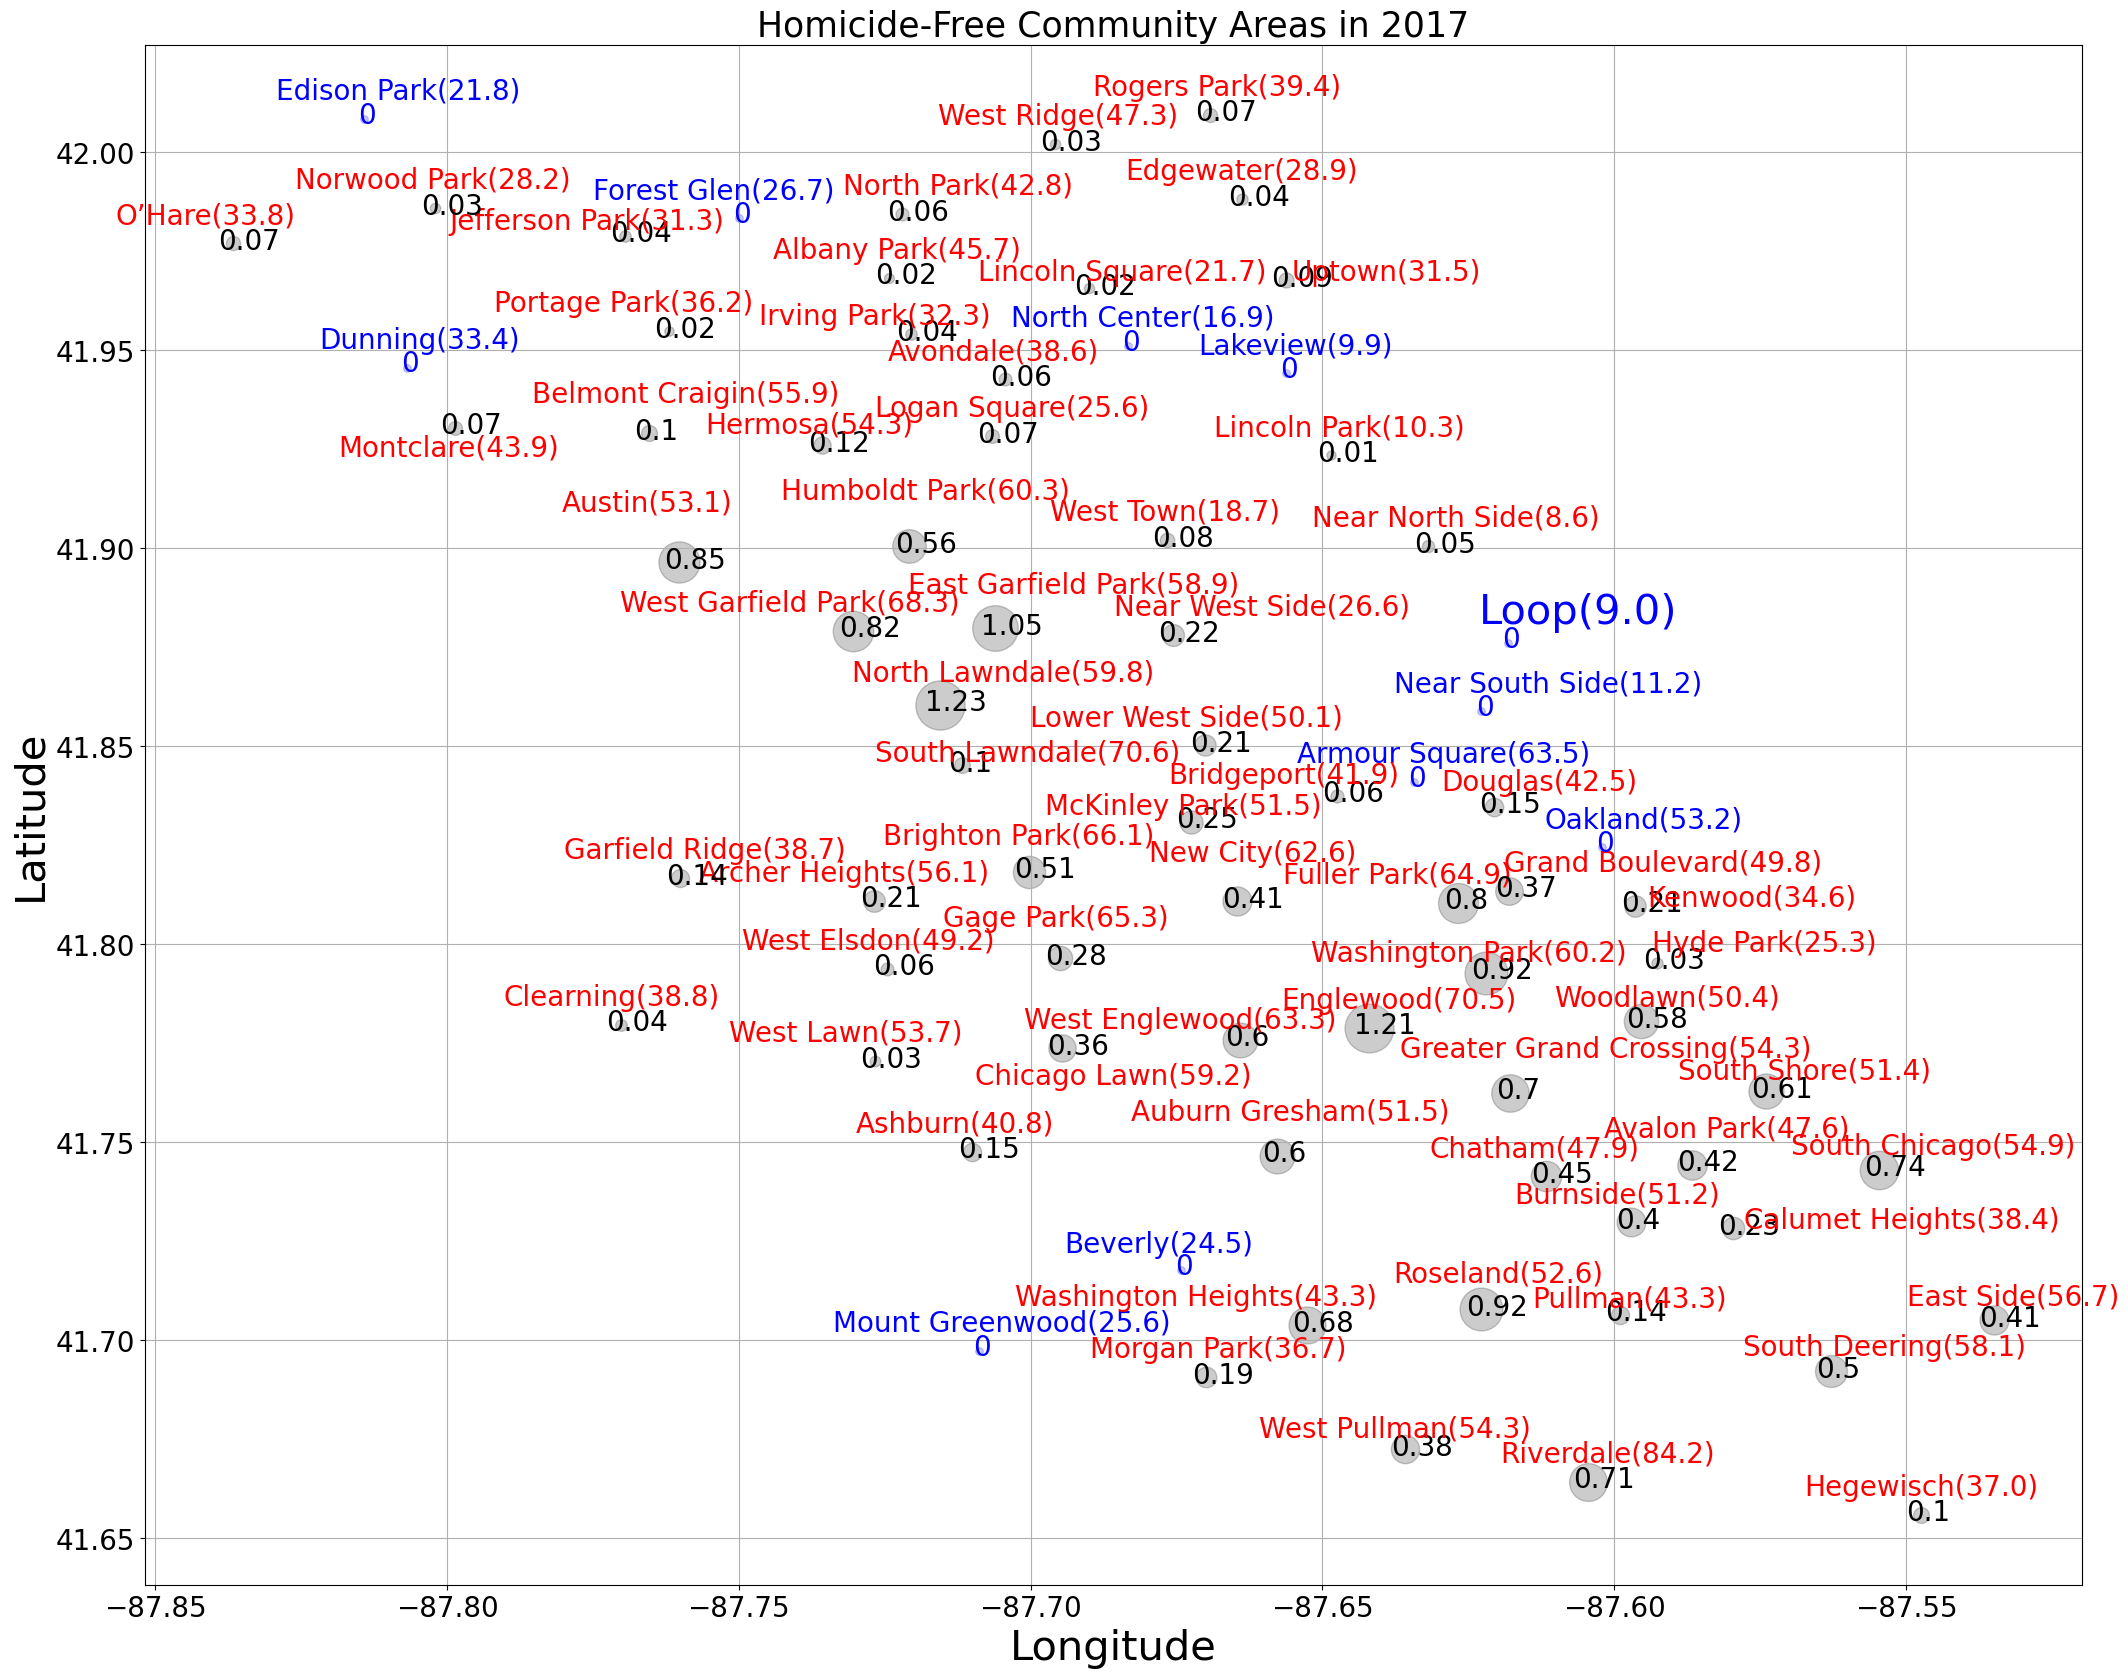

In [5]:
fig=plt.figure(figsize=(25,20))

for i in hom_df.index:
    
    if hom_df.loc[i,"HOM17"]==0:   
        plt.scatter(hom_df.loc[i,'LON'], hom_df.loc[i,'LAT'],s=30,color='b', alpha=0.2)
        plt.gca().text(hom_df.loc[i,'LON']-.001, hom_df.loc[i,'LAT']-.001,hom_df.loc[i,'HOM17'],color='b', alpha=1,size=20)
        if hom_df.loc[i,"Community"] in ["Loop"]:
            plt.gca().text(hom_df.loc[i,'LON']-.005, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=30)
        elif hom_df.loc[i,"Community"] in ["Hyde Park","Near West Side","Kenwood","Near North Side","West Town"]:
            plt.gca().text(hom_df.loc[i,'LON']+.003, hom_df.loc[i,'LAT']-.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Lincoln Park","Uptown","Edgewater","Rogers Park","Logan Square","Avondale"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']-.0075, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Lincoln Square","Irving Park","Portage Park","Jefferson Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025, hom_df.loc[i,'LAT']-.0075, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Dunning","O’Hare","Edison Park","Norwood Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
               
        elif hom_df.loc[i,"Community"] in ["Garfield Ridge","Clearning","Ashburn","Morgan Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.0015, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Hegewisch"]:
            plt.gca().text(hom_df.loc[i,'LON']-.01, hom_df.loc[i,'LAT']-.0075, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Forest Glen"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["North Center"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Oakland"]:
            plt.gca().text(hom_df.loc[i,'LON']-.01, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Mount Greenwood"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Lakeview"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Near South Side"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
      
        elif hom_df.loc[i,"Community"] in ["Edison Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='green', size=20)
        elif hom_df.loc[i,"Community"] in ["Beverly"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02, hom_df.loc[i,'LAT']+.0045, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        
        
        else:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        
    else:
        p=hom_df.loc[i,'population(K)']
        plt.scatter(hom_df.loc[i,'LON'], hom_df.loc[i,'LAT'],s=30+1000*hom_df.loc[i,'HOM17']/p,color='k', alpha=0.2)
        plt.gca().text(hom_df.loc[i,'LON']-.0025, hom_df.loc[i,'LAT']-.0015,str(round(hom_df.loc[i,'HOM17']/p,2)),color='k', alpha=1,size=20)
        if hom_df.loc[i,"Community"] in ["Austin"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.013, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Belmont Craigin"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.0078, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Chicago Lawn"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']-.009, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Pullman"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.002,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Roseland"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.007,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Garfield Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.04,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Oakland","Armour Square"]:
            plt.gca().text(hom_df.loc[i,'LON']-.001,hom_df.loc[i,'LAT']+.002,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Bridgeport"]:
            plt.gca().text(hom_df.loc[i,'LON']-.029,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["South Shore"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Pullman"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Washington Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
       
        elif hom_df.loc[i,"Community"] in ["Washington Heights"]:
            plt.gca().text(hom_df.loc[i,'LON']-.05,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Ridge","Albany Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["North Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.01,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Lincoln Square"]:
            plt.gca().text(hom_df.loc[i,'LON']-.019,hom_df.loc[i,'LAT']+.002,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Hermosa"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Montclare"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']-.007, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Town"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Near West Side"]:
            plt.gca().text(hom_df.loc[i,'LON']-.01,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Lower West Side"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["North Lawndale"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.006,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Douglas"]:
            plt.gca().text(hom_df.loc[i,'LON']-.009,hom_df.loc[i,'LAT']+.004,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Archer Heights"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["New City"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.01, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["South Chicago"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.004, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Lawn"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Kenwood"]:
            plt.gca().text(hom_df.loc[i,'LON']+.002,hom_df.loc[i,'LAT'], hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Grand Boulevard"]:
            plt.gca().text(hom_df.loc[i,'LON']-.001,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Fuller Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Hyde Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.001,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Calumet Heights"]:
            plt.gca().text(hom_df.loc[i,'LON']+.002,hom_df.loc[i,'LAT'],hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Jefferson Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.0015,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Uptown"]:
            plt.gca().text(hom_df.loc[i,'LON']+.001,hom_df.loc[i,'LAT'],hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Englewood"]:
            plt.gca().text(hom_df.loc[i,'LON']-.037,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Portage Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Irving Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.026, hom_df.loc[i,'LAT']+.0025, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Humboldt Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.022,hom_df.loc[i,'LAT']+.012,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Brighton Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.007, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["South Lawndale"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.001, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["McKinley Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.002, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Elsdon"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Gage Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.008, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Woodlawn"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.004, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Englewood"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Greater Grand Crossing"]:
            plt.gca().text(hom_df.loc[i,'LON']-.019,hom_df.loc[i,'LAT']+.009, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Auburn Gresham"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.009, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Avalon Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.007,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Burnside"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["East Side","South Deering"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.004, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Riverdale"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Norwood Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.024,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["East Garfield Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.009,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
       
        else:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        
#plt.gca().set_facecolor('lightgray')
plt.gca().grid()
plt.yticks(fontsize=20) 
plt.xticks(fontsize=20)
#title
plt.title('Homicide-Free Community Areas in 2017',size=25)
plt.xlabel("Longitude",size=30)
plt.ylabel("Latitude",size=30)
fig.savefig("Fig5revised.png") 
#show the plot
plt.show()